In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/second-hand-used-cars-data-set-linear-regression/train.csv


In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras.layers import Normalization,Dense,InputLayer
from tensorflow.keras.losses import MeanSquaredError,Huber,MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import RootMeanSquaredError

In [3]:
data=pd.read_csv('/kaggle/input/second-hand-used-cars-data-set-linear-regression/train.csv')

In [4]:
data

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,633238,743850,5,125092,1,6,11,171,95,97,190744.0
996,997,599626,848195,4,83370,2,9,14,161,101,120,419748.0
997,998,646344,842733,7,86722,1,8,9,196,113,89,405871.0
998,999,535559,732439,2,140478,4,5,9,184,112,128,74398.0


In [5]:
data.shape

(1000, 12)

In [6]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


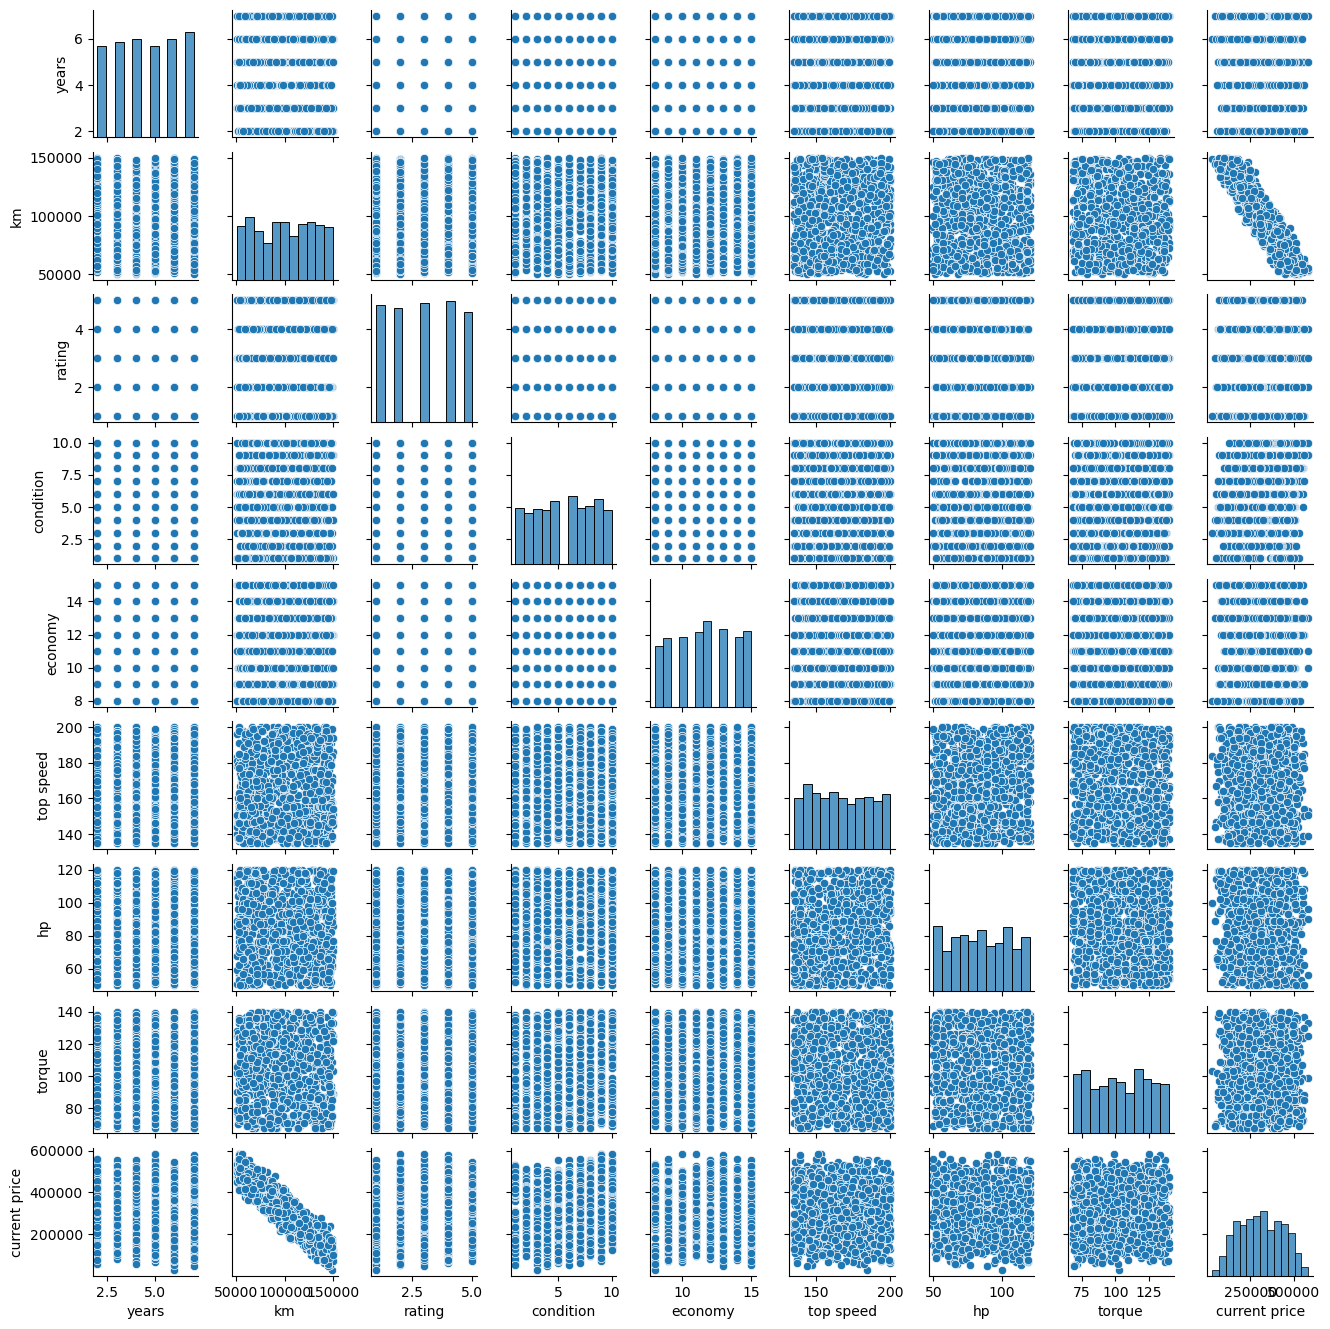

In [7]:
sns.pairplot(data[['years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price']], height=1.5)

In [8]:
tensor_data=tf.constant(data)
tensor_data=tf.cast(tensor_data,tf.float32)
print(tensor_data)
print(tensor_data.shape)

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 ... 7.300000e+01 1.230000e+02
  3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 ... 7.400000e+01 9.500000e+01
  2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 ... 5.300000e+01 9.700000e+01
  2.153860e+05]
 ...
 [9.980000e+02 6.463440e+05 8.427330e+05 ... 1.130000e+02 8.900000e+01
  4.058710e+05]
 [9.990000e+02 5.355590e+05 7.324390e+05 ... 1.120000e+02 1.280000e+02
  7.439800e+04]
 [1.000000e+03 5.901050e+05 7.797430e+05 ... 9.900000e+01 9.600000e+01
  4.149385e+05]], shape=(1000, 12), dtype=float32)
(1000, 12)


In [9]:
tensor_data=tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[9.050000e+02 6.011470e+05 7.612830e+05 ... 1.170000e+02 1.360000e+02
  1.977145e+05]
 [6.650000e+02 6.209630e+05 8.295110e+05 ... 1.180000e+02 9.600000e+01
  3.434165e+05]
 [4.140000e+02 5.067880e+05 8.554170e+05 ... 8.800000e+01 1.250000e+02
  1.881315e+05]
 ...
 [8.040000e+02 6.244330e+05 8.752970e+05 ... 7.400000e+01 1.130000e+02
  1.808915e+05]
 [4.870000e+02 6.783460e+05 7.721560e+05 ... 6.400000e+01 1.400000e+02
  4.274960e+05]
 [1.000000e+02 5.743530e+05 8.843150e+05 ... 7.900000e+01 1.050000e+02
  1.689405e+05]], shape=(1000, 12), dtype=float32)


In [10]:
X=tensor_data[:,3:-1]
X.shape

TensorShape([1000, 8])

In [11]:
y=tensor_data[:,-1]
print(y.shape)
#writing the shape properly
y=tf.expand_dims(y,axis=-1)
y.shape

(1000,)


TensorShape([1000, 1])

VALIDATION

In [12]:
TRAIN_RATIO=0.8
VAL_RATIO=0.1
TEST_RATIO=0.1
DATASET_SIZE=len(X)

In [13]:
X_train=X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train=y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)


In [14]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [15]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
print(X_val.shape)
print(y_val.shape)

(100, 8)
(100, 1)


In [16]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [17]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
print(X_test.shape)
print(y_test.shape)

(100, 8)
(100, 1)


In [18]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

**NORMALISING THE DATA**

In [19]:
normalizer=Normalization()
normalizer.adapt(X)
normalizer(X[:5])

<tf.Tensor: shape=(5, 8), dtype=float32, numpy=
array([[ 0.8374951 ,  0.75283706,  0.7217792 ,  0.4987539 ,  1.065292  ,
         0.00555067,  1.5826064 ,  1.5477347 ],
       [-0.9084981 , -0.16342151, -0.7046628 , -0.91816014, -1.6259743 ,
        -0.72063816,  1.631371  , -0.35266685],
       [-1.4904958 ,  0.7908658 , -0.7046628 , -1.2723887 ,  0.6167477 ,
         0.6798689 ,  0.16843304,  1.0251243 ],
       [-0.9084981 , -0.3531189 , -1.4178838 ,  1.2072109 , -1.6259743 ,
        -0.82437944,  1.0949605 , -0.06760662],
       [ 0.8374951 ,  1.0084325 ,  1.4350002 ,  1.2072109 ,  0.6167477 ,
         0.9910926 , -0.41674215,  1.6427548 ]], dtype=float32)>

In [20]:
model=tf.keras.Sequential([InputLayer(input_shape=(8,)),#give the batch size we give at a time
                            normalizer,#normalization for input to be normalised
                         Dense((128),activation='relu'),
                           Dense((128),activation='relu'),
                           Dense((128),activation='relu'),
                          Dense(1)])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 8)                17        
 n)                                                              
                                                                 
 dense (Dense)               (None, 128)               1152      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 34,322
Trainable params: 34,305
Non-trainable params: 17
___________________________________________________

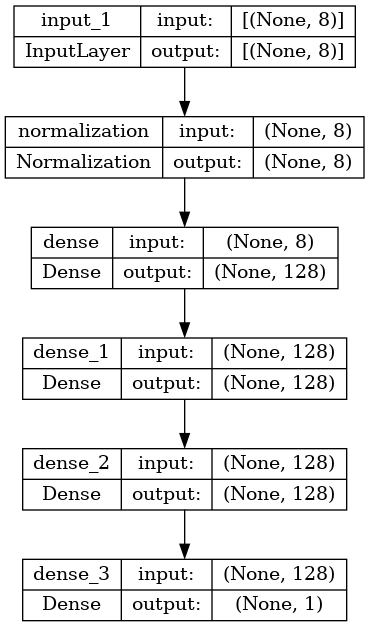

In [21]:
tf.keras.utils.plot_model(model,to_file='model.png',show_shapes=True)

**HUBLER L0SS**


loss = 0.5 * x^2                  if |x| <= d


loss = 0.5 * d^2 + d * (|x| - d)  if |x| > d

In [22]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss=MeanAbsoluteError(),
              metrics=RootMeanSquaredError())

In [23]:
history=model.fit(X,y,epochs=1000,validation_data=(X_val,y_val),verbose=1)

Epoch 1/1000
32/32 [==============================] - 1s 10ms/step - loss: 135027.8281 - root_mean_squared_error: 183981.1406 - val_loss: 96793.7031 - val_root_mean_squared_error: 113437.1406
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 55136.9219 - root_mean_squared_error: 69289.7109 - val_loss: 46885.8438 - val_root_mean_squared_error: 59573.5820
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 41769.0781 - root_mean_squared_error: 52451.5898 - val_loss: 38621.8008 - val_root_mean_squared_error: 45741.5078
Epoch 4/1000
32/32 [==============================] - 0s 3ms/step - loss: 42720.2656 - root_mean_squared_error: 53650.5547 - val_loss: 62793.8750 - val_root_mean_squared_error: 75591.6562
Epoch 5/1000
32/32 [==============================] - 0s 3ms/step - loss: 58929.2344 - root_mean_squared_error: 72751.3438 - val_loss: 49753.6992 - val_root_mean_squared_error: 61895.9062
Epoch 6/1000
32/32 [==============================] - 0s

In [24]:
model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 7037.7725 - root_mean_squared_error: 9654.3604


[7037.7724609375, 9654.3603515625]

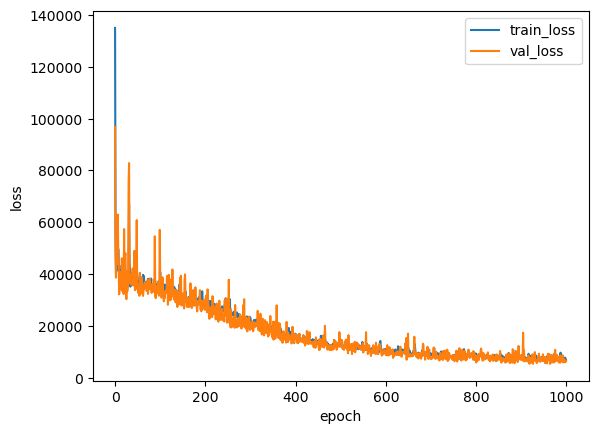

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'])
plt.show()

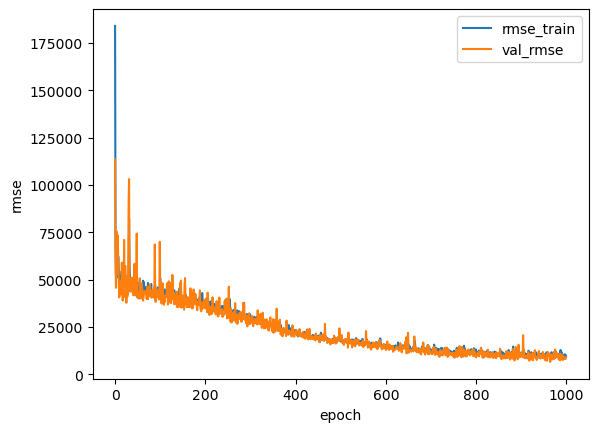

In [26]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.xlabel('epoch')
plt.ylabel('rmse')
plt.legend(['rmse_train','val_rmse'])
plt.show()

In [27]:
X_test.shape

TensorShape([100, 8])

In [28]:
y_pred=list(model.predict(X_test)[:,0])

4/4 [==============================] - 0s 2ms/step


In [29]:
model.predict(X_test[0])

1/1 [==============================] - 0s 83ms/step


array([[263484.75]], dtype=float32)

In [30]:
model.predict(tf.expand_dims(X_test[0], axis = 0 ))

1/1 [==============================] - 0s 24ms/step


array([[263484.75]], dtype=float32)

In [31]:
y_test[0]

<tf.Tensor: shape=(1,), dtype=float32, numpy=array([261568.], dtype=float32)>

In [32]:
y_true=list(y_test[:,0].numpy())

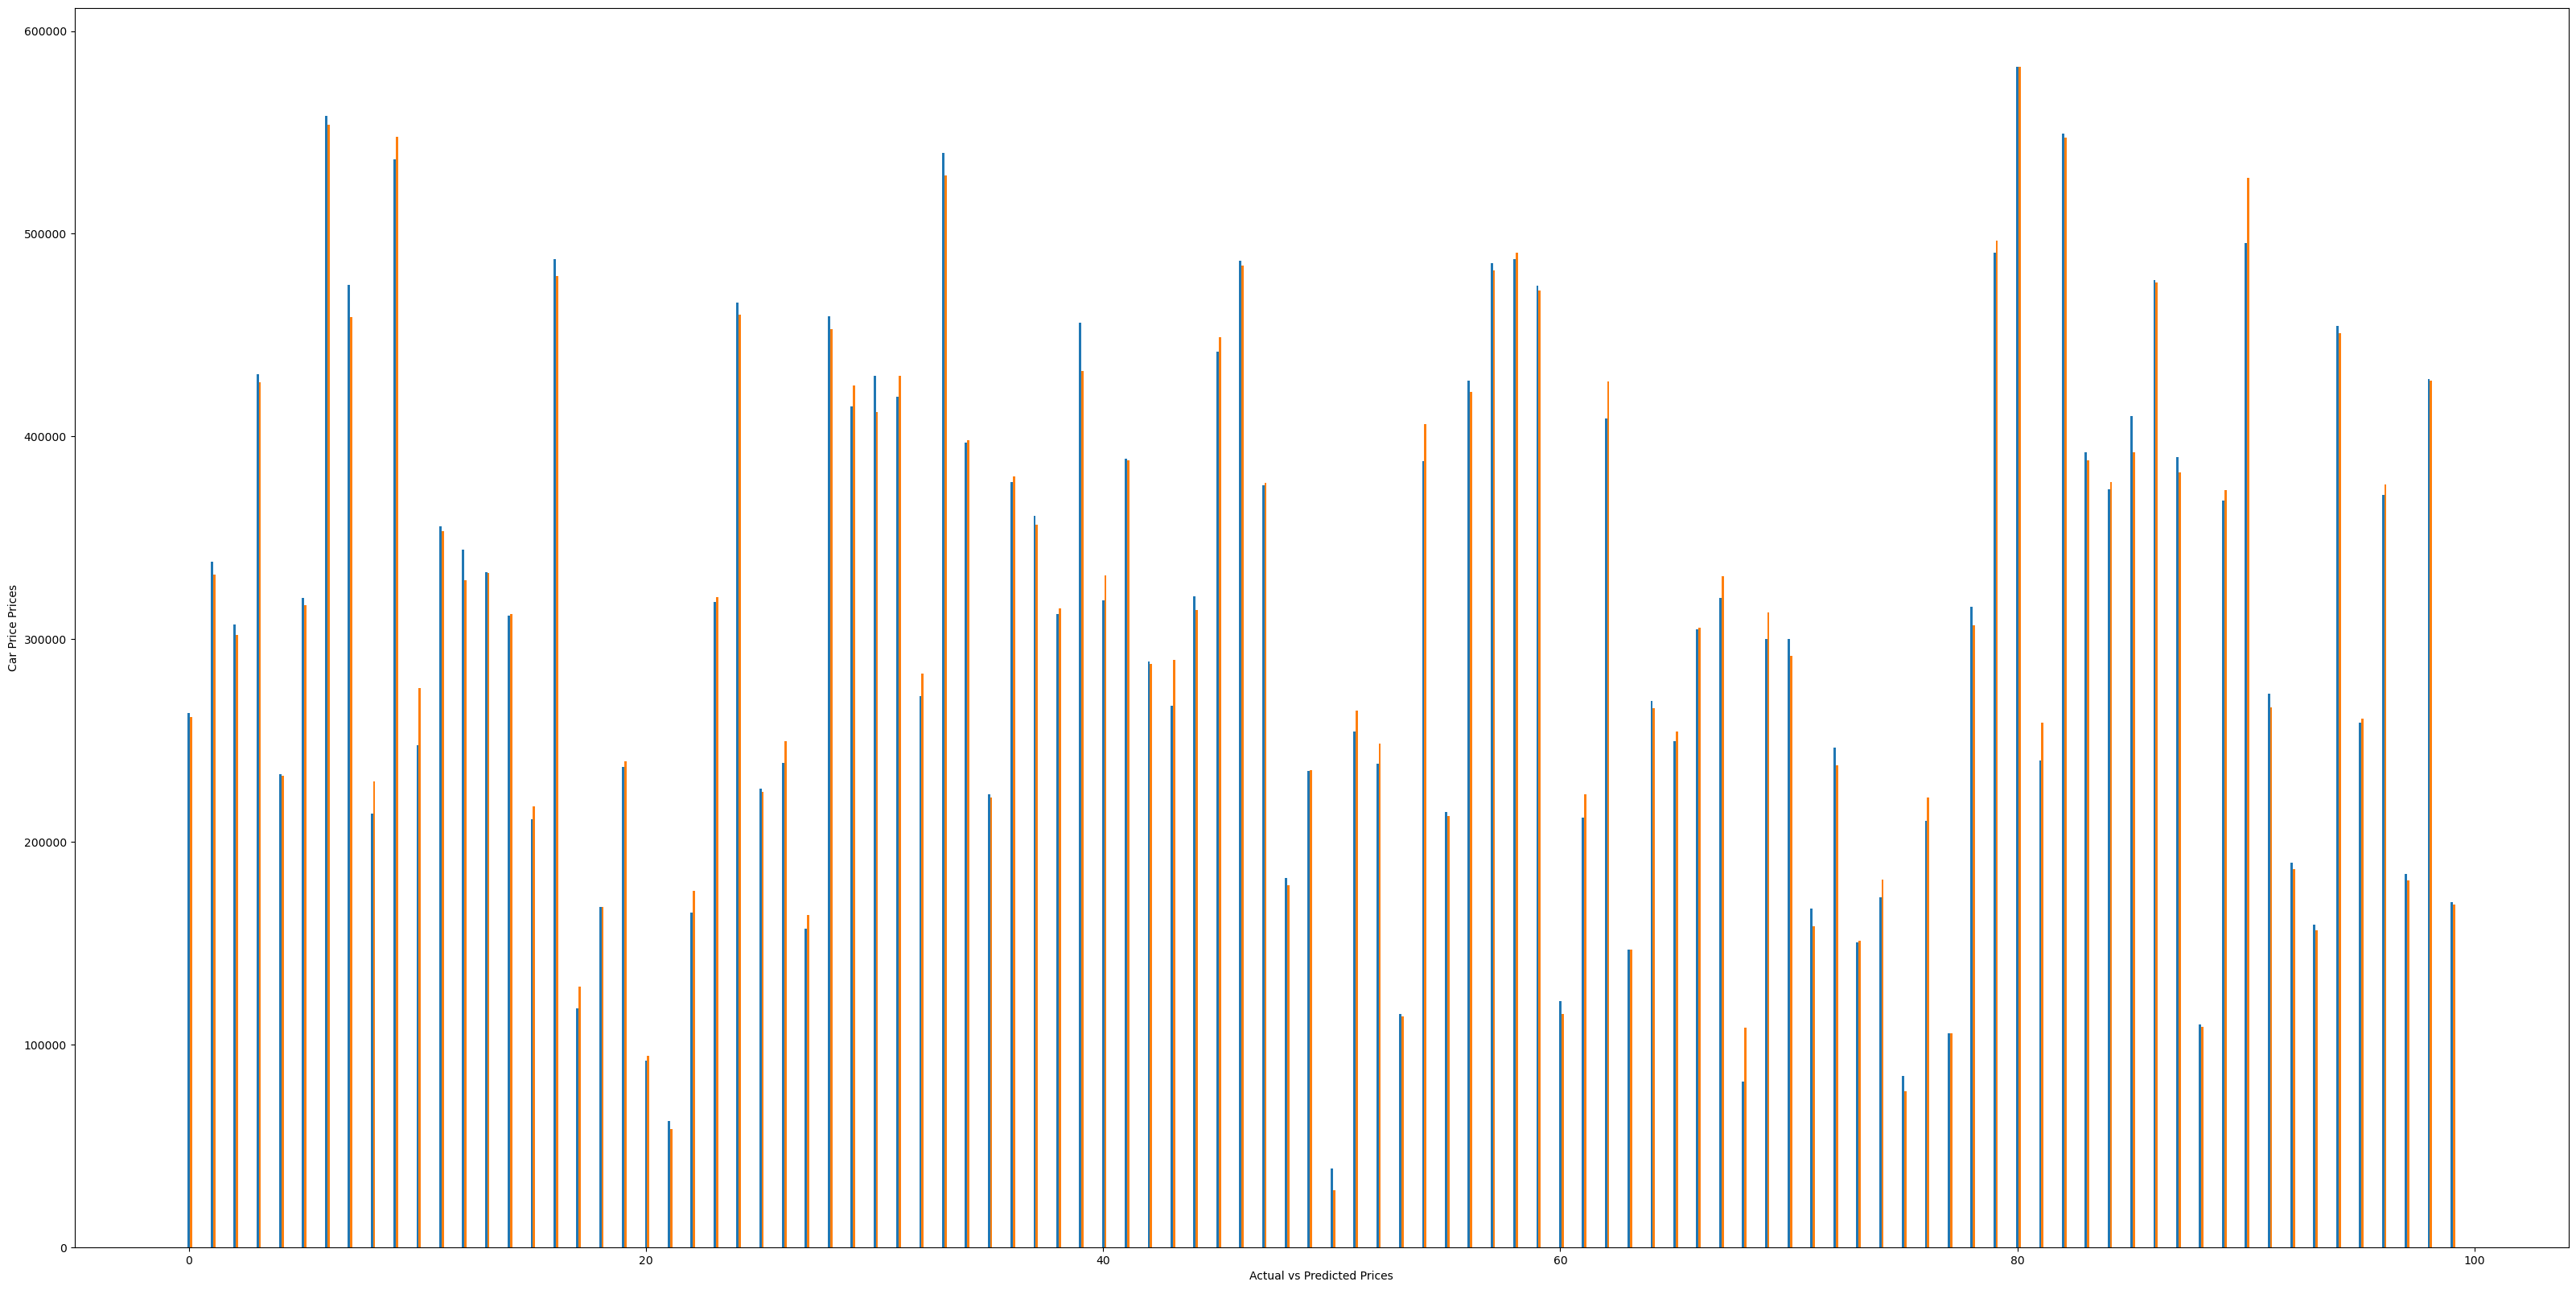

In [33]:
ind = np.arange(100)
plt.figure(figsize=(40,20))


width=0.1

plt.bar(ind,y_pred, width, label='Predicted Car Price')
plt.bar( ind+width,y_true, width, label='Actual Car Price')

plt.xlabel('Actual vs Predicted Prices')
plt.ylabel('Car Price Prices')

plt.show()

In [34]:
from  sklearn.metrics import r2_score

In [35]:
y_true=y_test.numpy()
y_true.shape

(100, 1)

In [36]:
y_pred=model.predict(X_test)
y_pred.shape

4/4 [==============================] - 0s 2ms/step


(100, 1)

In [37]:
r2_score(y_true,y_pred)

0.9943711330965154